# Exploring NLP

### Author: 
    * Sai Sumana Puppala
### Topic: 
    * Exploring various facets of NLP using Amazon Product Reviews

#### **Why is it interesting?**
Natural language processing (NLP) is an hot topic in data science and machine learning. While research in NLP dates back to the 1950's, the real revolution in this domain came in 1980's and 1990's with the introduction of statistical models and fast computing. Before this most language processing tasks made use of hand-coded rules which were generally not very robust.

The span of topics in Natural Language Processing is immense and we'll just be getting to the tip of the iceberg with the topic of document classification, also known as text classification. We will be working with the Scikit-learn library and an imbalanced dataset (corpus) (568k consumer reviews on different amazon products). The imbalance in the dataset will be caused by the imbalance in the number of samples in each of the categories we are trying to predict. Imbalanced data occurs quite frequently in classification problems and makes developing a good model more challenging. Often times it is too expensive or not possible to get more data on the classes that have too few samples. Developing strategies for dealing with imbalanced data is therefore paramount for creating a good classification model. 

#### **Theory behind:**
##### **Terminologies in NLP:**
* Corpus:
    A corpus is a large, structured set of machine-readable texts produced in a natural communicative setting. If we have a bunch of sentences in our dataset, all the sentences will come into the corpus, and the corpus would be like a paragraph with a mixture of sentences. Corpus is a collection of Documents.

* Documents:
    It is a unique text different from the corpus. If we have 100 sentences, each sentence is a document. Mathematical Representation of Documents is Vector.

* Vocabulary:

    Vocabulary is unique words involved in the corpus.
    * E.g. Sentence1 = He is a good boy
    * Sentence2 = He is a Bad boy
    * Vocabulary  = [He, is, good, boy, Bad]
 
##### **Text Preprocessing Steps:**
* Removal of Noise, URLs, Hashtag and User-mentions:
    We may have URLs, hashtags, and tags in our texts as they are scrapped from the internet. All these may create noise. So we need to remove them from our text.

* Lowercasing:
    In Corpus, there might be the same words, where both the words are added to vocabulary as the words are differentiated with capital and small letters involved in the words, But we need to add the word only once as both indicate the same meaning. To escape this situation, we lowercase all the words involved in the corpus.

* Replacing Emoticons and Emojis:
    Emoticons and emojis can be displayed incorrectly, Sometimes, it’s appropriate to remove emoticons and emojis, but in a sentiment analysis task instead of instance, they can be instrumental. In this situation, we can replace the emoji with some meaningful text. So it’s very much up to your discretion.

* Replacing elongated characters:
While we work with texts of public chats, we may find elongated words like hiiii, heeeey they need to be optimized to their original word.

* Stemming:
    Stemming is the technique to replace and remove the suffixes and affixes to get the root, base or stem word. We may find similar words in the corpus but with different spellings like having, have, etc. All those are similar in meaning, so to make them into a base word, we use a concept called stemming, which converts words to their base word.
        * E.g. History -> Histori

* Lemmatization:
    Lemmatization is a technique similar to stemming. In stemming rood word may or may not have the meaning, but in lemmatization, root word surely would have a meaning; it uses lexical knowledge to transform words into their base forms.
        * E.g. History -> History

##### **Feature Extraction**
Our next step would be identifying the features.
We have some techniques for representing text into vectors, so machines can understand the corpus easily. Those are word Embedding techniques. They are
1. One Hot Encoding

2. Bag of Words

3. Term Frequency Inverse Document Frequency (TF-IDF)

4. Word2Vec

## Data and Library Imports


In [1]:
import os
os.getcwd()

'/home/sumana/code/adv-data-science-info7390/assignment-2-understanding-data'

In [36]:
import pandas as pd
pd.set_option('display.max_colwidth', None)
from pandarallel import pandarallel
pandarallel.initialize(progress_bar=True)
import string
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
import nltk
from sklearn.svm import SVC
from bs4 import BeautifulSoup
from yellowbrick.text import FreqDistVisualizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from wordcloud import WordCloud, STOPWORDS
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


INFO: Pandarallel will run on 4 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [4]:
df = pd.read_csv('/home/sumana/code/data/Reviews.csv')

In [4]:
df.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


Score
1     52268
2     29769
3     42640
4     80655
5    363122
dtype: int64


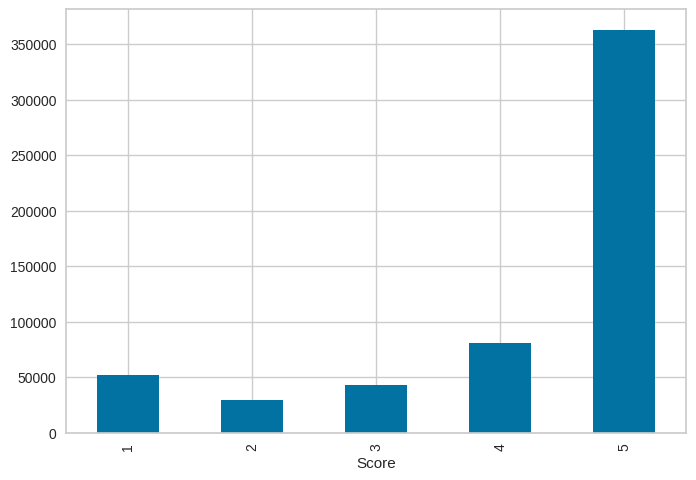

In [5]:
print(df.groupby('Score').size())
 
# Plotting the bar chart
%matplotlib inline
df.groupby('Score').size().plot(kind='bar');


In [7]:
#Drop na values
df.dropna(inplace=True)

In [8]:
df['Full_Text'] = df['Summary'] + ' ' + df['Text']

## Preprocces textual data (reviews)
* Clean HTML
* Remove Punctuations
* Lowering text
* Eliminate stop words
* Tokenization
* Stemming
* Lemmatization
* Create Target variable

In [24]:
def clean_html(html):

    # parse html content
    soup = BeautifulSoup(html, "html.parser")

    for data in soup(['style', 'script', 'code', 'a']):
        # Remove tags
        data.decompose()

    # return data by retrieving the tag content
    return ' '.join(soup.stripped_strings)

df['Full_Text_HTML'] = df['Full_Text'].parallel_apply(lambda x: clean_html(x))

In [10]:
def remove_punctuation(text):
    punctuation ="".join([i for i in text if i not in string.punctuation])
    return punctuation
#storing the puntuation free text
df['clean_review']= df['Full_Text_HTML'].parallel_apply(lambda x:remove_punctuation(x))

In [11]:
df['lower_review'] = df['clean_review'].parallel_apply(lambda x: x.lower())

In [12]:
def remove_stopwords(text):
    text = text.split()
    useless_words = nltk.corpus.stopwords.words("english")
    useless_words = useless_words + ['hi', 'im']
    text_filtered = [word for word in text if not word in useless_words]
    final_string = ' '.join(text_filtered)
    return final_string

# Creating the target variable
# df['Sentiment'] = np.where(df['Score']>3, 'positive', np.where(df['Score']==3, 'neutral', 'negative'))

In [13]:
df['no_stopwords']= df['lower_review'].parallel_apply(lambda x:remove_stopwords(x))

In [14]:
df['review_tokenized']= df['no_stopwords'].parallel_apply(lambda x: nltk.word_tokenize(x))

In [15]:
def stemming(text):
    stem_text = [porter_stemmer.stem(word) for word in text]
    final_string = ' '.join(stem_text)
    return final_string
porter_stemmer = PorterStemmer()
df['review_stemmed']= df['review_tokenized'].parallel_apply(lambda x: stemming(x))

In [17]:
df.to_pickle("AmazonReviews.pkl")
# df = pd.read_pickle(AmazonReviews.pkl)

In [18]:
df['review_stemmed'][:10]

0                                                                                                    good qualiti dog food bought sever vital can dog food product found good qualiti product look like stew process meat smell better labrador finicki appreci product better
1                                                                                                                                              advertis product arriv label jumbo salt peanutsth peanut actual small size unsalt sure error vendor intend repres product jumbo
2    delight say confect around centuri light pillowi citru gelatin nut case filbert cut tini squar liber coat powder sugar tini mouth heaven chewi flavor highli recommend yummi treat familiar stori cs lewi lion witch wardrob treat seduc edmund sell brother sister witch
3                                                                                                                                             cough medicin look secret ingredi robitussin 

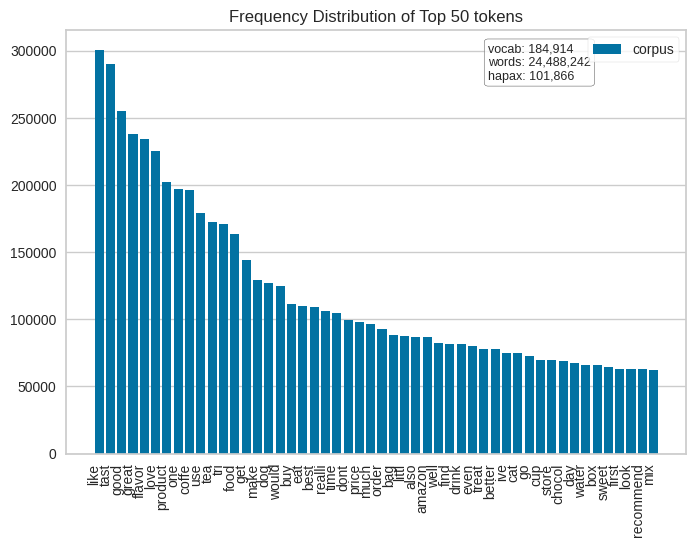

In [22]:
def word_distribution(text):
    vectorizer = CountVectorizer()
    docs = vectorizer.fit_transform(text)
    features = vectorizer.get_feature_names_out()
    # Freq Dist Visualizer
    visualizer = FreqDistVisualizer(features=features, orient='v')
    visualizer.fit(docs)
    visualizer.show()

word_distribution(df['review_stemmed'])

#### CountVectorizer: token counts 
####  Code block that demonstrates how CountVectorizer works:

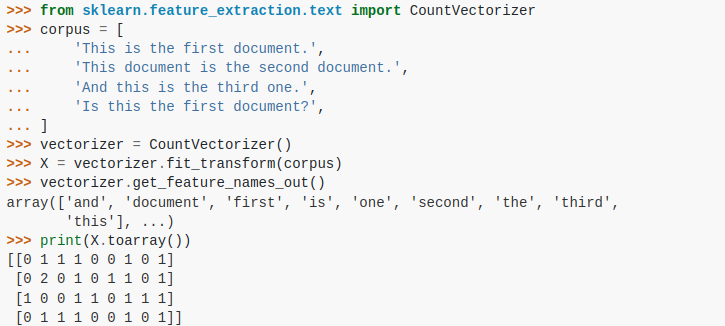

In [167]:
# Creating the target variable
df['Sentiment'] = np.where(df['Score']>3, 'positive', np.where(df['Score']==3, 'neutral', 'negative'))
y = df['Sentiment']

Sentiment
positive    78.070939
negative    14.427666
neutral      7.501394
Name: count, dtype: float64


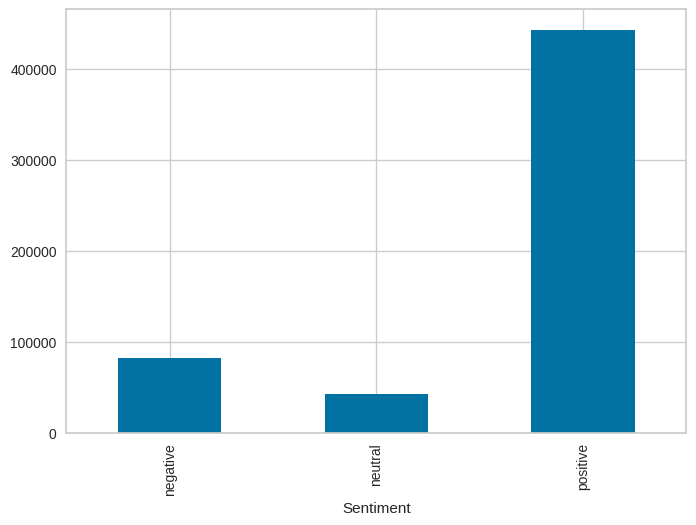

In [22]:
#Visualize the target variable
print(df.Sentiment.value_counts() / len(df) * 100)
# Plotting the bar chart
%matplotlib inline
df.groupby('Sentiment').size().plot(kind='bar');

In [26]:
from sklearn.preprocessing import LabelEncoder  

labeler = LabelEncoder()
df["target"] = labeler.fit_transform(df["Sentiment"])

mapping = dict(zip(labeler.classes_, range(len(labeler.classes_))))
print(mapping)

{'negative': 0, 'neutral': 1, 'positive': 2}


In [25]:
#Data is extremely imbalanced

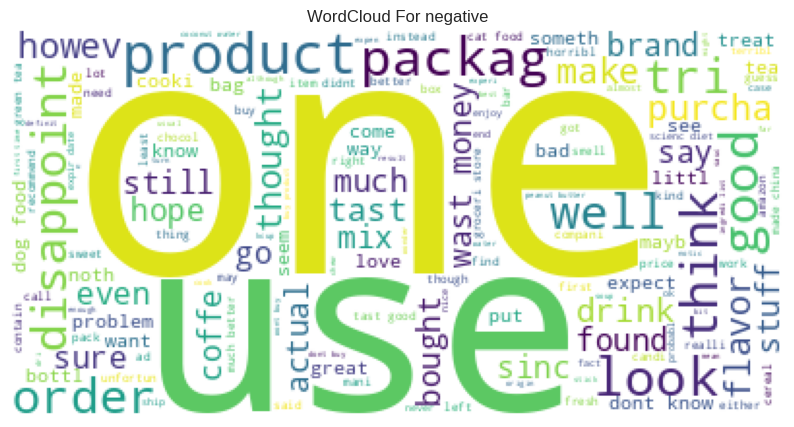

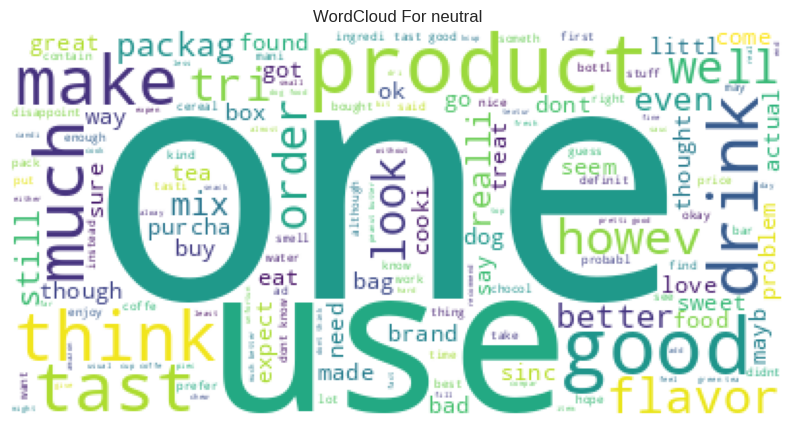

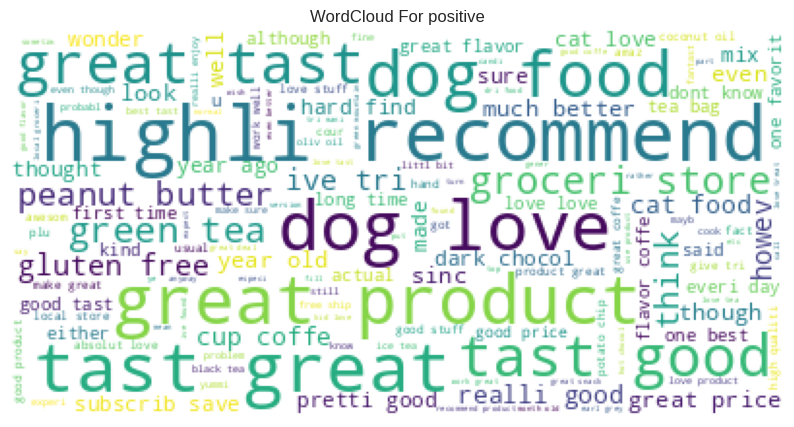

In [33]:
#Visualize Review word clouds for each target category
def plot_wordcloud(df: pd.DataFrame, category: str, target: int) -> None:
    words = " ".join(df[df["target"] == target]['review_stemmed'].values)

    plt.rcParams['figure.figsize'] = 10, 20
    wordcloud = WordCloud(stopwords=STOPWORDS, 
                          background_color="white",
                          max_words=1000).generate(words)

    plt.title("WordCloud For {}".format(category))
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()
    
for category, target in mapping.items():
    plot_wordcloud(df, category, target)

In [116]:
X.shape

(1000, 4851)

In [141]:
# Creating the feature vectors
#Let's consider a sample to observe tf idf transformation
vectorizer = CountVectorizer()
vectorizer_sample = CountVectorizer()
df_sample = df.sample(frac=1000/len(df), replace=True, random_state=1)
X_sample = vectorizer_sample.fit_transform(df_sample['review_stemmed'])
X = vectorizer.fit_transform(df['review_stemmed'])

#### TF-IDF:
The term-frequency is a sparse matrix where each row is a document in our training corpus ( D
 ) and each column corresponds to a term/word in the bag-of-words list. This can be confirmed by comparing the number of rows in the term-frequency matrix to the number of documents in the training set:
 
 Most often term-frequency alone is not a good measure of the importance of a word/term to a document's topic. Very common words like "the", "a", "to" are almost always the terms with the highest frequency in the text. Thus, having a high raw count of the number of times a term appears in a document does not necessarily mean that the corresponding word is more important. Furtermore, longer documents could have high frequency of terms that do not correlate with the document topic, but instead occur with high numbers solely due to the length of the document.

To circumvent the limination of term-frequency, we often normalize it by the inverse document frequency (idf). This results in the term frequency-inverse document frequency (tf-idf) matrix. The inverse document frequency is a measure of how much information the word provides, that is, whether the term is common or rare across all documents in the corpus. 

* TF-IDF Transformer:

* This algorithm works on a statistical measure of finding word relevance in the text that can be in the form of a single document or various documents that are referred to as corpus.

* The term frequency (TF) score measures the frequency of words in a particular document. In simple words, it means that the occurrence of words is counted in the documents.

* The inverse document frequency or the IDF score measures the rarity of the words in the text. It is given more importance over the term frequency score because even though the TF score gives more weightage to frequently occurring words, the IDF score focuses on rarely used words in the corpus that may hold significant information.

* TF-IDF algorithm finds application in solving simpler natural language processing and machine learning problems for tasks like information retrieval, stop words removal, keyword extraction, and basic text analysis. However, it does not capture the semantic meaning of words efficiently in a sequence.
  

    
    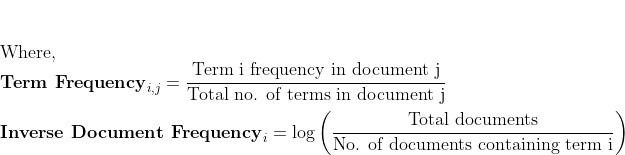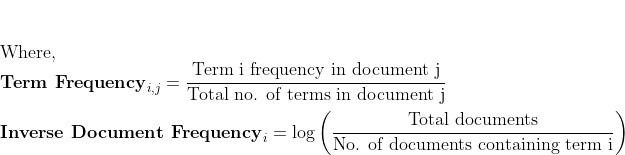

* Output of TfidfVectorizer:
    The rows represent each document, the columns represent the vocabulary, and the values of tf-idf(i,j) are obtained through the above formula. This matrix obtained can be used along with the target variable to train a machine learning/deep learning model.

In [145]:
tfidftransformer = TfidfTransformer()
Xt = tfidftransformer.fit_transform(X)
Xt_sample = tfidftransformer.fit_transform(X_sample)

In [142]:
y_sample = df_sample['Sentiment']
features = list(vectorizer_sample.vocabulary_.keys())
# tfidf_sorting = np.argsort(response.toarray()).flatten()[::-1]

In [165]:
len(features), len(y_sample), len(df_sample)

(5768, 1000, 1000)

In [157]:
def top_tfidf_feats(row, features, top_n=25):
    ''' Get top n tfidf values in row and return them with their corresponding feature names.'''
    topn_ids = np.argsort(row)[::-1][:top_n]
    top_feats = [(features[i], row[i]) for i in topn_ids]
    df = pd.DataFrame(top_feats)
    df.columns = ['feature', 'tfidf']
    return df

Calculate the average tf-idf score of all words across a number of documents (in this case all documents), i.e. the average per column of a tf-idf matrix:

In [159]:
def top_mean_feats(Xt_sample, features, grp_ids=None, min_tfidf=0.1, top_n=25):
    ''' Return the top n features that on average are most important amongst documents in rows
        indentified by indices in grp_ids. '''
    if grp_ids is not None:
        D = Xt_sample[grp_ids].toarray()
    else:
        D = Xt_sample.toarray()

    D[D < min_tfidf] = 0
    tfidf_means = np.mean(D, axis=0)
    return top_tfidf_feats(tfidf_means, features, top_n)

Calling this function with grp_ids=None, gives us the most important words across the whole corpus. Here are the top 15:

In [209]:
top_mean_feats(Xt_sample, features, grp_ids=None, min_tfidf=0.1, top_n=25)

,feature,tfidf
0,mail,0.027477
1,da,0.026387
2,addictiveb,0.022666
3,narrow,0.022162
4,jim,0.018669
5,humangrad,0.018479
6,kirkland,0.018265
7,element,0.016822
8,yuck,0.016427
9,fec,0.016416


We then calculate the mean of each column across the selected rows, which results in a single row of tf-idf values. And this row we then simply pass on to our previous function for picking out the top n words. One crucial trick here, however, is to first filter out the words with relatively low scores (smaller than the provided threshold). This is because common words, such as ‘a’ or ‘the’, while having low tf-idf scores within each document, are so frequent that when averaged over all documents they would otherwise easily dominate all other terms.

In [160]:
def top_feats_by_class(Xt_sample, y_sample, features, min_tfidf=0.1, top_n=25):
    ''' Return a list of dfs, where each df holds top_n features and their mean tfidf value
        calculated across documents with the same class label. '''
    dfs = []
    labels = np.unique(y_sample)
    for label in labels:
        ids = np.where(y_sample==label)[0]
        feats_df = top_mean_feats(Xt_sample, features, ids, min_tfidf=min_tfidf, top_n=top_n)
        feats_df.label = label
        dfs.append(feats_df)
    return dfs
dfs = top_feats_by_class(Xt_sample, y_sample, features)

The above function returns a list of DataFrames, one per document class, and each containing the top n features. Let's visualize the top 25 features for each Review category.

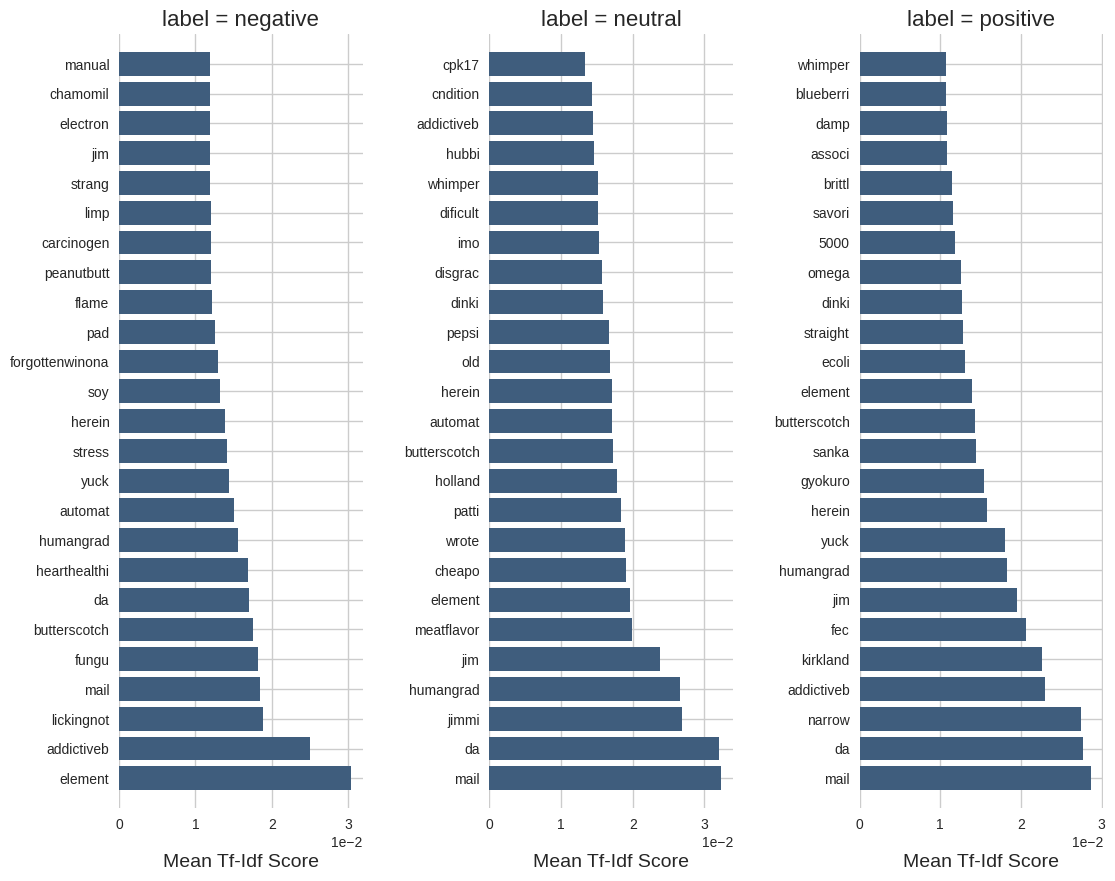

In [161]:
def plot_tfidf_classfeats_h(dfs):
    ''' Plot the data frames returned by the function plot_tfidf_classfeats(). '''
    fig = plt.figure(figsize=(12, 9), facecolor="w")
    x = np.arange(len(dfs[0]))
    for i, df in enumerate(dfs):
        ax = fig.add_subplot(1, len(dfs), i+1)
        ax.spines["top"].set_visible(False)
        ax.spines["right"].set_visible(False)
        ax.set_frame_on(False)
        ax.get_xaxis().tick_bottom()
        ax.get_yaxis().tick_left()
        ax.set_xlabel("Mean Tf-Idf Score", labelpad=16, fontsize=14)
        ax.set_title("label = " + str(df.label), fontsize=16)
        ax.ticklabel_format(axis='x', style='sci', scilimits=(-2,2))
        ax.barh(x, df.tfidf, align='center', color='#3F5D7D')
        ax.set_yticks(x)
        ax.set_ylim([-1, x[-1]+1])
        yticks = ax.set_yticklabels(df.feature)
        plt.subplots_adjust(bottom=0.09, right=0.97, left=0.15, top=0.95, wspace=0.52)
    plt.show()
plot_tfidf_classfeats_h(dfs)

In [172]:
# Splitting the data into training and testing sets
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
Xt_train, Xt_test, yt_train, yt_test = train_test_split(Xt, y, test_size = 0.2, random_state = 42)

#### Naives Bayes Classifier

In [173]:
# Training the model
clf = OneVsRestClassifier(MultinomialNB())
clf.fit(Xt_train, yt_train)

# Evaluating the model on CountVectorizer
print('Evaluating the model')
yt_pred = clf.predict(Xt_test)
yt_score = classifier.predict_proba(Xt_test)
print('Accuracy:', accuracy_score(yt_test, yt_pred))
print('Classification report:', classification_report(yt_test, yt_pred))
print('Confusion matrix:', confusion_matrix(yt_test, yt_pred))

Evaluating the model
Accuracy: 0.7949965253648367
Classification report:               precision    recall  f1-score   support

    negative       0.92      0.10      0.18     16452
     neutral       0.51      0.00      0.00      8460
    positive       0.79      1.00      0.88     88769

    accuracy                           0.79    113681
   macro avg       0.74      0.37      0.36    113681
weighted avg       0.79      0.79      0.72    113681

Confusion matrix: [[ 1690     2 14760]
 [   54    20  8386]
 [   86    17 88666]]


#### Conclusion:
* We have so far explored cleaning textual data. 
* Creating feature vectors using Count vectorizer and TF IDF Vectorizer and then used Naive Bayes to classify amazon product reviews into 3 categories.
    * Positive
    * Negative
    * Neutral
* We have done sone exploratory data analysis to observe most frequent words in the corpus.
* We have also calculated the mean tf idf scores for a random sample of data depending on a document's class label, covering the concepts of how one might go about analyzing the results of a tf-idf transformation in python.


#### Next Steps:
### What's more?
* Let's explore dealing with imbalanced class, for better prediction results
* Expanding on more complex word embeddings
* Exploring word2vec embeddings and visualizing that in a 2d space.
* Exploring knowledge graphs